# SSA

In [157]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

## Temperature

In [158]:
# read in the data
data = pd.read_csv('Datasets/calcofi_combined_temp.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,3,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,3,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,3,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,3,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,3,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8
35385,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4
35386,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9
35387,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6


In [159]:
# data['Sta_ID'] = data['Sta_ID'].str.split().str[0]
# data

In [160]:
# sort the data
data_sorted = data.sort_values(by=['Julian_Date'], ascending = True)

# Check the sorted data
data_sorted[['Sta_ID', 'Julian_Date', 'T_degC']]

,Sta_ID,Julian_Date,T_degC
27,092.0 039.0,17957.0,9.122188
0,054.0 056.0,17958.0,8.414828
30,092.0 068.0,17958.0,8.997188
28,092.0 048.0,17958.0,10.742083
29,092.0 058.0,17958.0,8.352187
...,...,...,...
35355,083.3 051.0,44329.0,12.887538
35354,083.3 042.0,44329.0,12.847083
35356,083.3 055.0,44329.0,10.221739
35353,083.3 040.6,44329.0,15.534375


In [161]:
# data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='ChlorA')
data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='T_degC')
data_chla.head()

Sta_ID,001.0 168.0,001.0 263.5,002.0 065.7,004.0 086.0,004.0 088.0,004.0 099.0,004.0 104.0,004.0 121.0,004.0 138.5,004.0 155.7,...,170.0 030.0,170.0 040.0,170.5 092.0,171.0 036.0,171.0 038.0,171.0 040.0,173.3 000.0,173.3 010.0,173.3 030.0,176.7 030.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
17957.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17958.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
# Filter columns that have more than 150 non-null values
filtered_data = data_chla.loc[:, data_chla.notnull().sum(axis=0) > 325]
filtered_data

Sta_ID,090.0 037.0
Julian_Date,
17957.0,NaN
17958.0,NaN
17959.0,NaN
17960.0,NaN
17961.0,NaN
...,...
44325.0,NaN
44326.0,NaN
44327.0,NaN


In [172]:
# normalize the data
filtered_data = (filtered_data - np.mean(filtered_data))/np.std(filtered_data)
filtered_data.head()

/Users/andreajackman/miniconda3/envs/eosc410/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Sta_ID,090.0 037.0
Julian_Date,
17957.0,NaN
17958.0,NaN
17959.0,NaN
17960.0,NaN
17961.0,NaN


(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

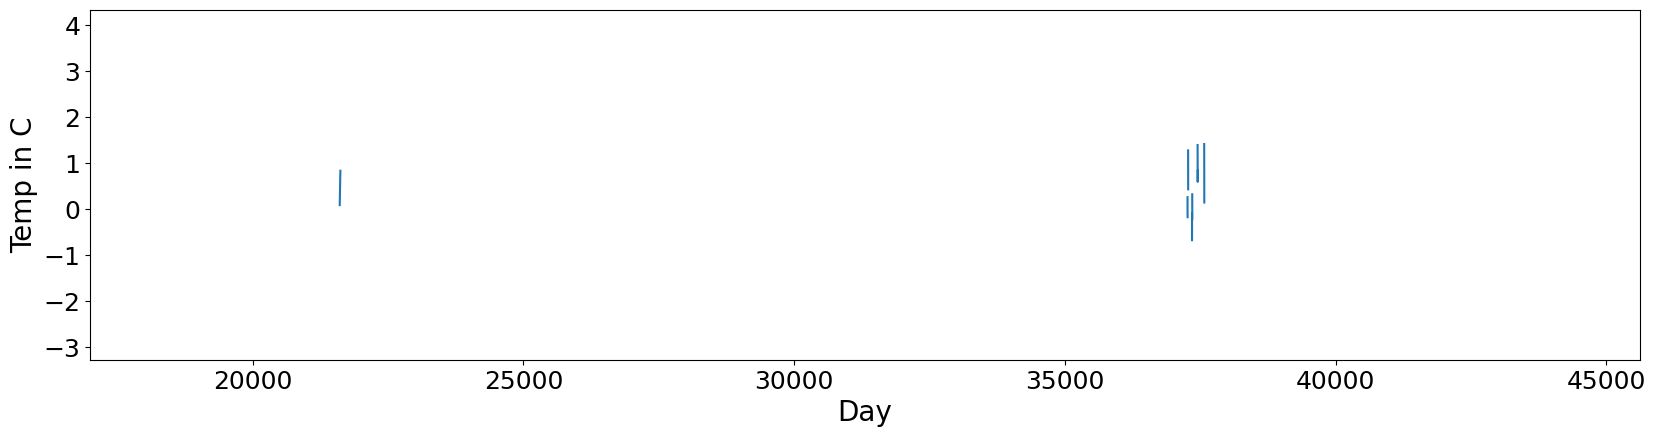

In [173]:
# plot the data over time
saveIt = 0

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.plot(filtered_data)
plt.ylabel('Temp in C', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

In [174]:
# drop nas
filtered_data = filtered_data.dropna(subset=['090.0 037.0'])
filtered_data

Sta_ID,090.0 037.0
Julian_Date,
18301.0,-1.982300
18338.0,-2.320730
18362.0,-1.664808
18391.0,-2.653346
18427.0,-1.848578
...,...
40839.0,-0.322362
40942.0,-0.420725
40998.0,-0.463911


In [176]:
#prep for SSA

L = 30
n_obs = np.shape(filtered_data)[0] - L + 1
SSA_input = np.empty((n_obs, L))

for kk in range(n_obs):
    SSA_input[kk,:] = filtered_data['090.0 037.0'].values[kk:kk+L]

filtered_data['090.0 037.0'].values[kk:kk+L]

array([-0.06882985, -0.09110998, -0.09295673, -0.14437635,  0.21622476,
        1.04049597,  0.64269689,  0.50937422, -0.17864875,  0.03863901,
       -0.36436923, -0.86534452,  1.50972148,  0.61130601,  0.16554155,
       -0.17337966,  0.79316   ,  0.77989398,  0.36694328,  0.11608704,
        0.31480029,  0.2315833 , -0.27688695, -0.54863082,  0.59773103,
       -0.32236237, -0.42072485, -0.4639111 ,  0.18266898, -0.0143404 ])

In [177]:
#do SSA (PCA on the lagged matrix)
n_modes = np.min(np.shape(SSA_input))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SSA_input)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

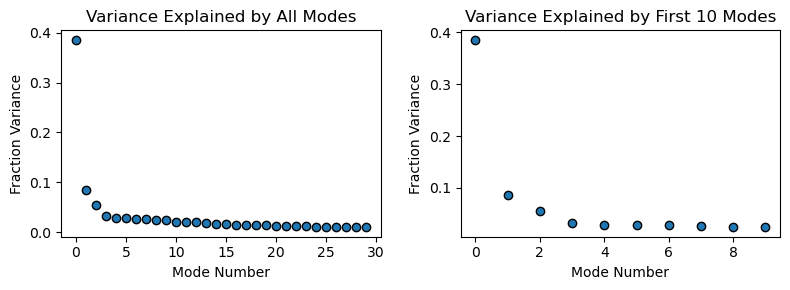

In [178]:
#plot fraction of variance explained by each mode

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
ax[0].set_xlabel('Mode Number')
ax[0].set_ylabel('Fraction Variance')
ax[0].set_title('Variance Explained by All Modes')

n_modes_show = 10
ax[1].scatter(range(n_modes_show),fracVar[:n_modes_show], edgecolor = 'k')
ax[1].set_xlabel('Mode Number')
ax[1].set_ylabel('Fraction Variance')
ax[1].set_title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

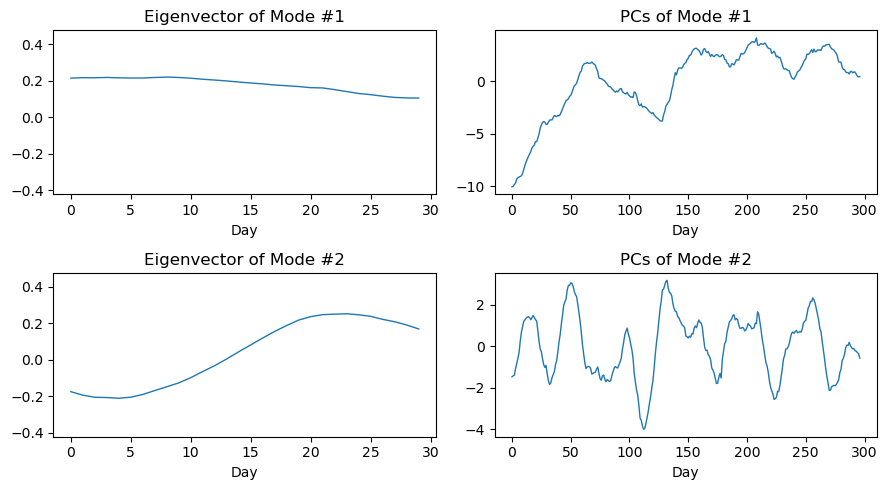

In [179]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
n = 2
fig, ax = plt.subplots(n, 2, figsize=(9, 2.5*n))

for kk in range(n):
    ax[kk, 0].plot(eigvecs[kk], lw=1)
    ax[kk, 0].set_ylim((np.min(eigvecs),np.max(eigvecs)))
    ax[kk, 0].set_xlabel('Day')
    ax[kk, 0].set_title('Eigenvector of Mode #'+str(kk+1))

    ax[kk, 1].plot(PCs[:,kk], lw=1)
    ax[kk, 1].set_title('PCs of Mode #' + str(kk+1))
    ax[kk, 1].set_xlabel('Day')

plt.tight_layout()

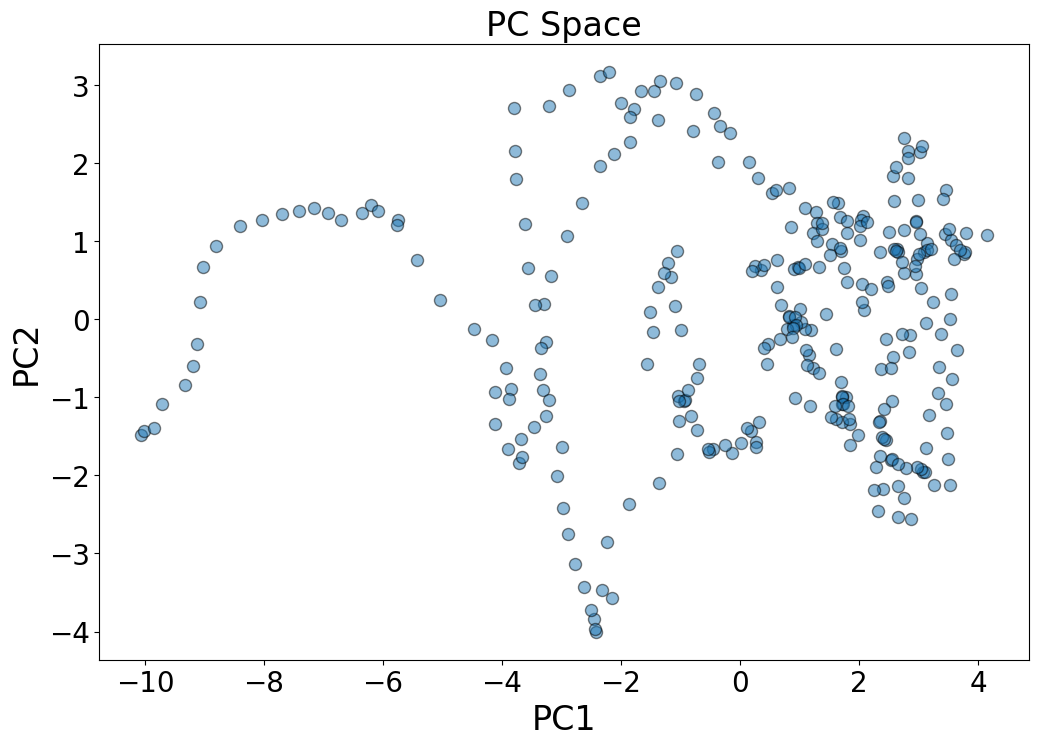

In [180]:
#visualize PC-space

saveIt = 1

plt.figure(figsize = (12,8))

plt.scatter(PCs[:,0],PCs[:,1], s = 75, alpha = 0.5, edgecolor = 'k')
plt.ylabel('PC2', fontsize = 24)
plt.xlabel('PC1', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('PC Space', fontsize = 24)

if saveIt:
    plt.savefig('tutorial6_fig5.png')

## Chlorophyll A

In [183]:
# read in the data
data = pd.read_csv('Datasets/calcofi_combined.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,18832,133.0 035.0,0.650000,0.425000,13.172667,34.336533,2.785000,NaN,NaN,14.103333,...,3,67,25.850000,-113.500000,26731.0,12.0,3.0,19.0,6.0,1001.6
1,18833,142.7 008.0,2.483333,1.103333,16.316316,34.930211,2.298421,NaN,27.489474,NaN,...,3,69,25.026666,-110.750000,26733.0,7.0,NaN,19.2,NaN,1001.7
2,18834,142.0 008.0,0.240000,3.330000,14.762400,34.833250,2.067200,NaN,NaN,NaN,...,3,69,25.093333,-110.783333,26733.0,4.0,1.0,20.6,3.0,1001.7
3,18835,120.0 010.0,2.425000,2.483000,15.270000,NaN,3.535000,1.812000,31.675000,NaN,...,3,70,28.856666,-113.258333,26734.0,15.0,1.0,18.8,1.0,1001.0
4,18836,120.0 009.0,5.540909,2.557273,14.281923,NaN,2.874615,NaN,NaN,NaN,...,3,71,28.878333,-113.191666,26735.0,10.0,1.0,18.9,2.0,1000.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13929,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8
13930,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4
13931,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9
13932,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6


In [184]:
# data['Sta_ID'] = data['Sta_ID'].str.split().str[0]
# data

In [185]:
# sort the data
data_sorted = data.sort_values(by=['Julian_Date'], ascending = True)

# Check the sorted data
data_sorted[['Sta_ID', 'Julian_Date', 'ChlorA']]

,Sta_ID,Julian_Date,ChlorA
0,133.0 035.0,26731.0,0.650000
1,142.7 008.0,26733.0,2.483333
2,142.0 008.0,26733.0,0.240000
3,120.0 010.0,26734.0,2.425000
10,117.0 007.0,26735.0,6.092727
...,...,...,...
13900,083.3 051.0,44329.0,1.018909
13899,083.3 042.0,44329.0,0.599818
13897,081.8 046.9,44329.0,0.931000
13890,080.0 051.0,44329.0,3.092000


In [186]:
# data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='ChlorA')
data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='ChlorA')
data_chla.head()

Sta_ID,044.0 053.0,046.0 048.7,046.0 050.7,046.0 053.0,046.7 049.0,047.0 050.7,047.0 053.0,047.0 058.5,047.5 055.7,047.5 060.7,...,133.3 050.0,133.3 060.0,136.7 023.0,136.7 030.0,136.7 040.0,136.7 050.0,136.7 060.0,142.0 008.0,142.7 008.0,149.0 021.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
26731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,2.483333,NaN
26734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26735.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# Filter columns that have more than 150 non-null values
filtered_data = data_chla.loc[:, data_chla.notnull().sum(axis=0) > 171]
filtered_data

Sta_ID,090.0 053.0
Julian_Date,
26731.0,NaN
26733.0,NaN
26734.0,NaN
26735.0,NaN
26737.0,NaN
...,...
44325.0,NaN
44326.0,NaN
44327.0,NaN


In [199]:
# normalize the data
filtered_data = (filtered_data - np.mean(filtered_data))/np.std(filtered_data)
filtered_data.head()

/Users/andreajackman/miniconda3/envs/eosc410/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Sta_ID,090.0 053.0
Julian_Date,
26731.0,NaN
26733.0,NaN
26734.0,NaN
26735.0,NaN
26737.0,NaN


(array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7')])

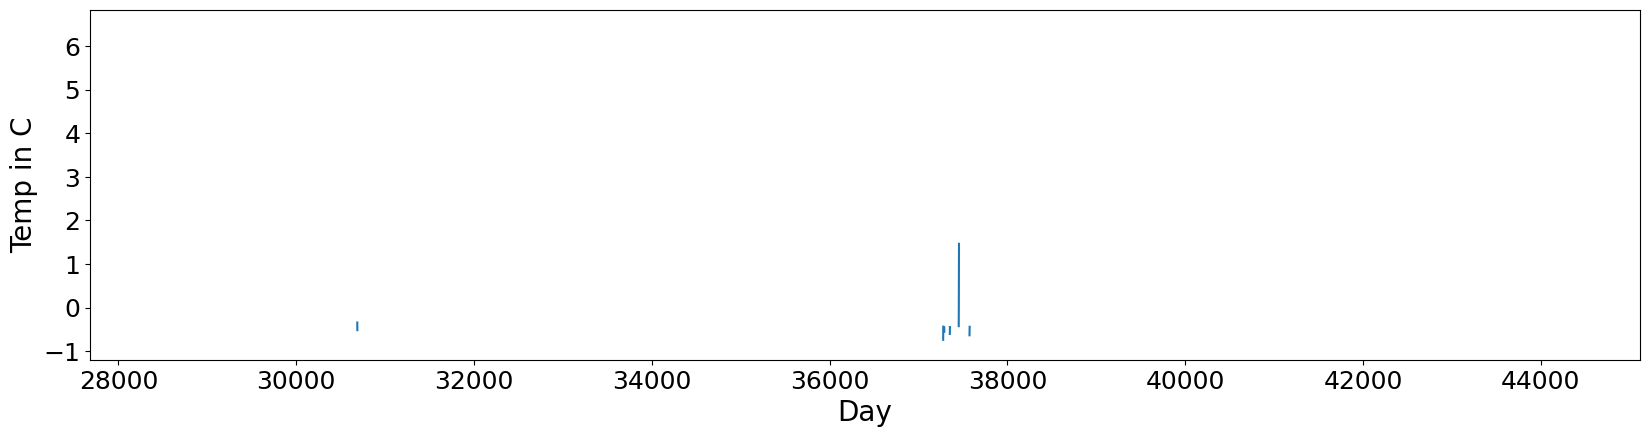

In [200]:
# plot the data over time
saveIt = 0

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.plot(filtered_data)
plt.ylabel('Temp in C', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

In [201]:
# drop nas
filtered_data = filtered_data.dropna(subset=['090.0 053.0'])
filtered_data

Sta_ID,090.0 053.0
Julian_Date,
28475.0,0.244348
28508.0,-0.831923
28547.0,-0.645159
28588.0,-0.602743
28638.0,-0.320152
...,...
40838.0,-0.662563
40941.0,-0.582094
40998.0,-0.313588


In [202]:
#prep for SSA

L = 30
n_obs = np.shape(filtered_data)[0] - L + 1
SSA_input = np.empty((n_obs, L))

for kk in range(n_obs):
    SSA_input[kk,:] = filtered_data['090.0 053.0'].values[kk:kk+L]

filtered_data['090.0 053.0'].values[kk:kk+L]

array([ 0.05001273, -0.53563425, -0.15965458,  1.41411015,  0.46879454,
       -0.54653221,  0.28319895,  0.07247201,  2.26786636,  0.9867636 ,
       -0.47368794,  1.15354979, -0.29637446,  0.09208834,  0.06102915,
       -0.35667825, -0.26892098, -0.4771294 , -0.18103135, -0.38637956,
       -0.44615625, -0.49433671, -0.19053213,  3.00241266,  1.10232937,
       -0.66256345, -0.58209398, -0.31358828,  1.01732527,  4.21074854])

In [203]:
#do SSA (PCA on the lagged matrix)
n_modes = np.min(np.shape(SSA_input))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SSA_input)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

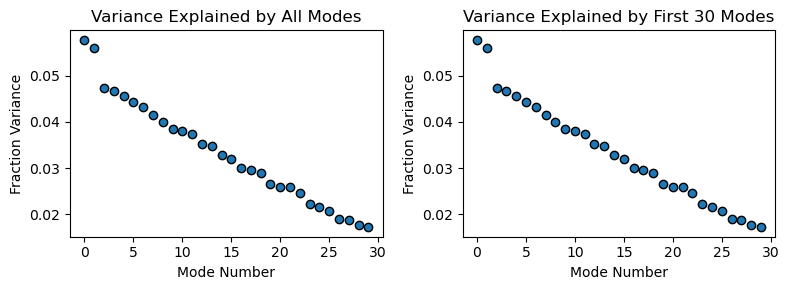

In [205]:
#plot fraction of variance explained by each mode

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
ax[0].set_xlabel('Mode Number')
ax[0].set_ylabel('Fraction Variance')
ax[0].set_title('Variance Explained by All Modes')

n_modes_show = 30
ax[1].scatter(range(n_modes_show),fracVar[:n_modes_show], edgecolor = 'k')
ax[1].set_xlabel('Mode Number')
ax[1].set_ylabel('Fraction Variance')
ax[1].set_title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

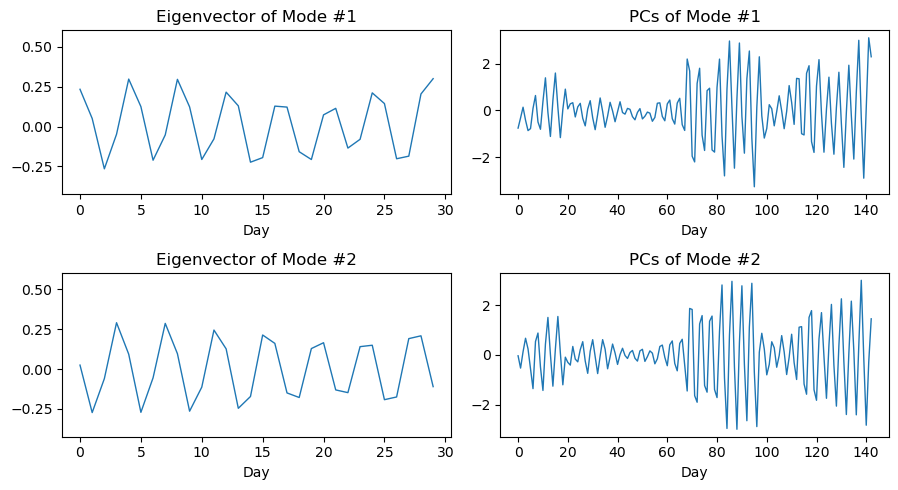

In [206]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
n = 2
fig, ax = plt.subplots(n, 2, figsize=(9, 2.5*n))

for kk in range(n):
    ax[kk, 0].plot(eigvecs[kk], lw=1)
    ax[kk, 0].set_ylim((np.min(eigvecs),np.max(eigvecs)))
    ax[kk, 0].set_xlabel('Day')
    ax[kk, 0].set_title('Eigenvector of Mode #'+str(kk+1))

    ax[kk, 1].plot(PCs[:,kk], lw=1)
    ax[kk, 1].set_title('PCs of Mode #' + str(kk+1))
    ax[kk, 1].set_xlabel('Day')

plt.tight_layout()

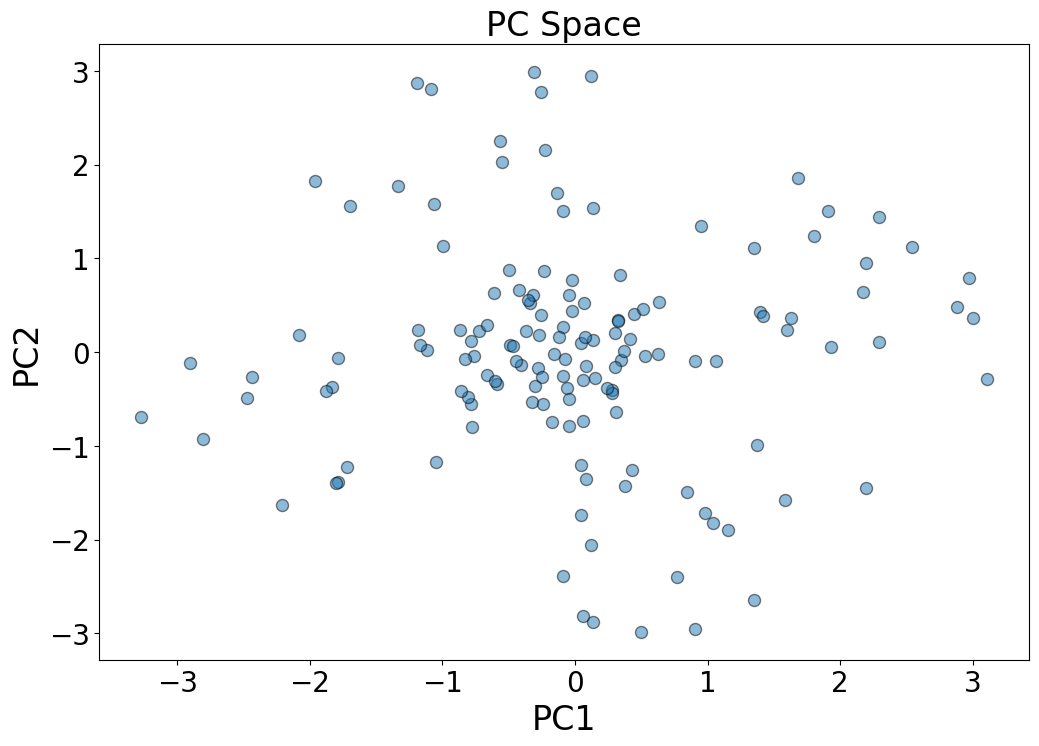

In [207]:
#visualize PC-space

saveIt = 1

plt.figure(figsize = (12,8))

plt.scatter(PCs[:,0],PCs[:,1], s = 75, alpha = 0.5, edgecolor = 'k')
plt.ylabel('PC2', fontsize = 24)
plt.xlabel('PC1', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('PC Space', fontsize = 24)

if saveIt:
    plt.savefig('tutorial6_fig5.png')